In [1]:
# Loading the train, validation and test sets as pd.DataFrame
import pandas as pd 
import numpy as np

train_data = pd.read_csv('train.csv')
validation_data = pd.read_csv('Validation.csv')
test_data = pd.read_csv('task_A_En_test.csv')

In [2]:
# Ignores redundant warnings in output
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Data exploration
# shows first 5 rows of the training set (of which only the tweet and sarcastic variables are needed)
train_data[['tweet','sarcastic']].head()

,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not “forced” to...,1
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1


In [4]:
# shows first 5 rows of validation set
validation_data[['tweet','sarcastic']].head()

,tweet,sarcastic
0,City life can be rad and all but I really real...,0
1,Elaine Quijano exhibits roughly the same amoun...,1
2,i really do genuinely wish him a good and fast...,0
3,Powerful. I was diagnosed with PTSD 1 year ago...,0
4,So weird how Venmo hasnt venmoed me yet really...,1


In [5]:
# shows first 5 rows of the test set
test_data.head()

,text,sarcastic
0,"Size on the the Toulouse team, That pack is mo...",0
1,Pinball!,0
2,So the Scottish Government want people to get ...,1
3,villainous pro tip : change the device name on...,0
4,I would date any of these men 🥺,0


In [7]:
# Data Preprocessing

# Importing and downloading necessary libraries and functions
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Lines below only needed when it is run for the first time
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

# Function that cleans the tweet and text variables
def clean_text(text):
    if isinstance(text, str): # ensures text is a string before cleaning
        text = re.sub(r'@[A-Za-z0-9]+', '', text)
        text = re.sub(r'#', '', text)
        text = re.sub(r'RT[\s]+', '', text)
        text = re.sub(r'https?:\/\/\S+', '', text)
        text = re.sub(r':', '', text)
        text = re.sub(r'‚Ä¶', '', text)
        text = re.sub(r'[^\x00-\x7F]+', '', text)
        return text
    # if text is not a string, return an empty string
    else:
        return ''

# Cleaning the tweet and text variables in the sets
train_data['tweet'] = train_data['tweet'].apply(clean_text)
validation_data['tweet'] = validation_data['tweet'].apply(clean_text)
test_data['text'] = test_data['text'].apply(clean_text)



In [9]:
# Showing the first 5 rows of the training set, validation set, and test set, respectively, after it has been cleaned
train_data[['tweet','sarcastic']].head()

,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not forced to g...,1
4,"I did too, and I also reported Cancun Cruz ...",1


In [10]:
validation_data[['tweet','sarcastic']].head()

,tweet,sarcastic
0,City life can be rad and all but I really real...,0
1,Elaine Quijano exhibits roughly the same amoun...,1
2,i really do genuinely wish him a good and fast...,0
3,Powerful. I was diagnosed with PTSD 1 year ago...,0
4,So weird how Venmo hasnt venmoed me yet really...,1


In [11]:
test_data.head()

,text,sarcastic
0,"Size on the the Toulouse team, That pack is mo...",0
1,Pinball!,0
2,So the Scottish Government want people to get ...,1
3,villainous pro tip change the device name on ...,0
4,I would date any of these men,0


In [9]:
# seeing if there is any missing values in the training, validation and test set
train_data.isnull().sum()

Unnamed: 0                0
tweet                     0
sarcastic                 0
rephrase               2601
sarcasm                2601
irony                  2601
satire                 2601
understatement         2601
overstatement          2601
rhetorical_question    2601
dtype: int64

In [12]:
validation_data.isnull().sum()

Unnamed: 0    0
tweet         0
sarcastic     0
dtype: int64

In [13]:
# missing data stuff
test_data.isnull().sum()

text         0
sarcastic    0
dtype: int64

In [14]:
# take the only meaningful columns 
# in this case tweet and sarcastic
train_data = train_data[['tweet', 'sarcastic']]

#double check 
train_data.columns

Index(['tweet', 'sarcastic'], dtype='object')

In [15]:
# Assigning X and y for the the train, validation and test data 

X_train = train_data['tweet']
y_train = train_data['sarcastic']

X_val = validation_data['tweet']
y_val = validation_data['sarcastic']

X_test = test_data['text']
y_test = test_data['sarcastic']



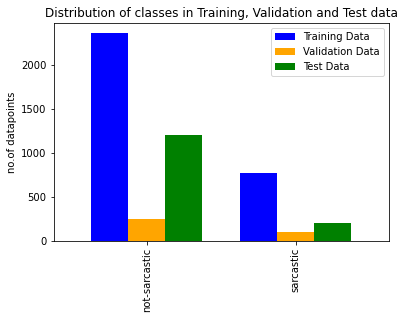

In [26]:
#visualize the target variable (and the class imbalance)
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

# Plot showing distribution of class 'sarcastic'
plt.figure()

# Plotting training and test data & their distribution
train_data['sarcastic'].value_counts().plot(kind='bar', color='blue', width=0.25, position=1, label='Training Data')
validation_data['sarcastic'].value_counts().plot(kind='bar', color='orange', width=0.25, position=0, label='Validation Data')
test_data['sarcastic'].value_counts().plot(kind='bar', color='green', width=0.25, position=-1, label='Test Data')

# Setting the labels and everything
plt.xticks([0.125,1.125],['not-sarcastic', 'sarcastic'])
plt.xlim(-0.5, 1.75)
plt.ylabel('no.of datapoints')
plt.title('Distribution of classes in Training, Validation and Test data')
plt.legend()
plt.show()


In [27]:
# specifying the number of data points for the training set
train_data['sarcastic'].value_counts()

0    2355
1     767
Name: sarcastic, dtype: int64

Performing on validation set:

In [28]:
# Vectorization of the training features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 10, stop_words= 'english', ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the validation data using the fitted vectorizer
X_val_tfidf = tfidf.transform(X_val)

In [30]:
# oversample the minority class to balance the data 
from imblearn.over_sampling import RandomOverSampler 

rosy = RandomOverSampler(random_state = 42)
X_train_rosy, y_train_rosy = rosy.fit_resample(X_train_tfidf, y_train)

In [33]:
# initialising and training the RF model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

RF = RandomForestClassifier(n_estimators=400, random_state=42, max_depth=5)

RF.fit(X_train_rosy, y_train_rosy)

y_pred_rosy = RF.predict(X_val_tfidf)

# Print performance metrics on validation set
print(classification_report(y_val, y_pred_rosy))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       246
           1       0.37      0.34      0.35       100

    accuracy                           0.64       346
   macro avg       0.55      0.55      0.55       346
weighted avg       0.63      0.64      0.64       346



Performing on test set:

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Transform the test data using the fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)


In [35]:
from imblearn.over_sampling import RandomOverSampler 

# Using the X_train_rosy and the model (RF) defined already, but redefining y_pred_rosy
y_pred_rosy = RF.predict(X_test_tfidf)

# Print performance metrics on test set
print(classification_report(y_test, y_pred_rosy))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1200
           1       0.30      0.46      0.37       200

    accuracy                           0.77      1400
   macro avg       0.60      0.64      0.61      1400
weighted avg       0.82      0.77      0.79      1400

